#  Frequent Pattern Mining and Association Rule Analysis

A **frequent pattern** is a pattern, such as a set of items, subsequences, or substructures, that frequently occurs in a dataset. **Frequent pattern mining** searches for such recurring relationships in a given data set.
For example, a **frequent itemset** is a set of items, such as bread and milk, that frequently appear together in a transaction data set. A subsequence, such as buying first a PC, then a digital camera, and then a memory card, if it frequently occurs in a shopping history database, is a **frequent sequential pattern**. A substructure can refer to different structural forms, such as subgraphs, subtrees, or sublattices. If A substructure frequently occurs in a graph database is called a **frequent structural pattern**. Frequent pattern mining is also known as **frequent episode mining** or **affinity analysis**. In this notebook, we will focus on mining itemsets.


A typical example of frequent itemset mining is market basket analysis. This process analyzes customer buying habits by finding associations between the different items that customers place in their "shopping baskets." The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. For instance, if customers buy milk, how likely are they to also buy bread (and what kind of bread) on the same trip to the supermarket? This information can lead to increased sales by helping retailers do selective marketing and plan their shelf space. 

<img src='../images/market_data.PNG'>

**Fig. A transaction dataset.** 


In this dataset, bread and butter occur together in 60% of the transactions. So the occurrence of {bread, butter} is a frequent pattern. How can we take advantage of this knowledge? In one strategy, items that are frequently purchased together can be placed in proximity to further encourage the combined sale of such items. In an alternative strategy, placing bread and butter at opposite ends of the store may entice customers who purchase such items to pick up other items along the way. 



### Representing collections of itemsets


A transaction database contains sets of items (itemsets) together with additional information. For example, a transaction in the database contains a transaction ID and an itemset. Collections of itemsets used for transaction databases can be represented as **binary incidence matrices** with columns corresponding to the items and rows corresponding to the itemsets. The matrix entries represent the presence (1) or absence (0) of an item in a particular itemset. Shown below on the left, an example of a binary incidence matrix containing itemsets for above supermarket data example and vertical layout for the same is shown on right. 

<img src="../images/data_representation.PNG">


Since a typical frequent itemset or a typical transaction (e.g., a supermarket transaction)
only contains a small number of items compared to the total number of available items, the
binary incidence matrix will in general be very sparse with many items and a very large
number of rows. A natural representation for such data is a sparse matrix format.


A set of items is referred to as an **itemset**. An itemset that contains $k$ items is a $k$-itemset. The set {bread, butter} is a 2-itemset. The **occurrence frequency** of an itemset is the number of transactions that contain the itemset. This is also known, simply, as the **frequency**, **support count**, or **count** of the itemset. If the support of an itemset satisfies a prespecified **minimum support threshold**, then the itemset is a frequent itemset. 


## Association Rule Mining or Affinity Analysis or Frequent Episode Mining

In general, association rule mining can be viewed as a two-step process:

1. Find all frequent itemsets: By definition, each of these itemsets will occur at least as
frequently as a predetermined minimum support count, min sup.
2. Generate strong association rules from the frequent itemsets: By definition, these
rules must satisfy minimum support and minimum confidence.



### Step 1: Finding Frequent Itemsets

**Apriori** Method is a basic algorithm for finding frequent itemsets. Apriori employs an iterative approach known as a level-wise search, where k-itemsets are used to explore (k + 1)-itemsets. First, the set of frequent 1-itemsets is found by scanning the database to accumulate the count for each item, and collecting those items that satisfy minimum support. The resulting set is denoted by L1. Next, L1 is used to find L2, the set of frequent 2-itemsets, which is used to find L3, and so on, until no more frequent k-itemsets can be found. The finding of each Lk requires one full scan of the database. To improve the efficiency of the level-wise generation of frequent itemsets, an important property called the Apriori property is used to reduce the search space.

**Apriori property: All nonempty subsets of a frequent itemset must also be frequent.**


![Chonyy_PatternMining.png](../images/Chonyy_PatternMining.png)

### Step 2: Generating Association Rules from Frequent Itemsets

Frequent itemset patterns can be represented in the form of **association rules.** For example, the information that customers who purchase bread also tend to buy butter at the same time is represented in the following association rule: 

```
bread => butter [support = 60%, confidence = 75%]. 
```

Frequent if-then associations called association rules which consists of an **antecedent** (if) and a **consequent** (then). Rule **support** and **confidence** are two measures of rule interestingness. They respectively reflect the usefulness and certainty of discovered rules. A support of 60% for a rule means that 60% of all the transactions under analysis show that bread and butter are purchased together. A confidence of 75% means that 75% of the customers who purchased bread also bought butter. Typically, association rules are considered **interesting** if they satisfy both a **minimum support threshold** and a **minimum confidence threshold**. These thresholds can be set by users or domain experts. Additional analysis can be performed to discover interesting statistical correlations between associated items. 

**A formal definition of association rules is as follows:**

Let $I = {i_1, i_2, . . . , i_n}$ be a set of **items**. Let $D = {t_1, t_2, . . . , t_m}$
be a set of **transactions called the database**. Each transaction in $D$ has a unique transaction ID and contains a subset of the items in $I$. A **rule** is defined as an implication of the form $X \Rightarrow Y$ where $X,Y \subseteq I$ and $X \cap Y = \emptyset$. The sets of items (for short **itemsets**) $X$ and $Y$ are called **antecedent** (LHS) and **consequent** (RHS) of the rule, respectively.

## Assessing Frequent Itemset Patterns and Association Rules

*Association rules* are rules which surpass a user-specified **minimum support** and **minimum confidence thresholds**. 

### Support 

The **support supp(X) of an itemset** $X$ is the number of transactions that contain $X$, i.e., $sup(X) = \left| t(X) \right|$. The **relative support** is defined as the proportion of transactions in the dataset which contain the itemset $X$, i.e., $rsup(X) = \frac{\left| t(X) \right|}{\left| D \right|}$. Sometimes support and and relative support are used interchangeablly. In this lab we will use the word **support** to denote both **support** and **relative support**. 

The **support of the rule** is defined as the proportion of transactions that contain both $X$ and $Y$, that is, $sup(X \Rightarrow Y ) = sup(XY) = \frac{sup(X \cup Y )}{sup(D)}$. This estimation is the **empirical joint probability** of the items ($X \cup Y$) comprising the rule. 

The range of support is $[0, 1]$. 





### Confidence

The **confidence of a rule** is defined as 

$\text{conf}(X \Rightarrow Y ) = \frac{\text{sup}(X \cup Y )}{\text{sup}(X)} = \frac{\text{count}(X \cup Y )}{\text{count}(X)}$ 

This is the **conditional probability** estimation of $P(Y|X)$. The range of confidence is $[0, 1]$.


Rules that satisfy both a minimum support threshold (min sup) and a minimum confidence threshold (min conf ) are called **strong**.


Therefore, an association rule $X \Rightarrow Y$ will satisfy the following condition where $\sigma$ and $\delta$ are the minimum support and minimum confidence, respectively.

$$ sup(X \cup Y ) ≥ \sigma $$

                                                and

$$ conf(X \Rightarrow Y) ≥ \delta $$


In addition to support and confidence scores, other scores are also used to assess rules.




### Lift 

Another popular measure for association rules is lift. Lift is defined as the ratio of the observed joint probability of X and Y to the expected joint probability if they were statistically independent. This score is used to measure surprise in a rule. The lift of a rule is defined as:

$$ \text{lift}(X \Rightarrow Y) = \frac{sup(X \cup Y )}{(sup(X)sup(Y))} =  
   \frac{conf(X\Rightarrow Y)}{sup(Y)}$$

In other words, the above formula can be interpreted as the deviation of the support of the whole rule from the support expected under independence. The range of lift is $[0, \inf]$. A lift value close to 1 means that the support of a rule is expected considering the supports of its components. We usually look for values that are much larger (i.e., above expectation) or smaller than 1 (i.e., below expectation).

- If $\text{lift}(X \Rightarrow Y) \sim 1$, expected
- If $\text{lift}(X \Rightarrow Y) < 1$, below expectation
- If $\text{lift}(X \Rightarrow Y) > 1$, above expectation




### Leverage

Leverage computes the difference between the support of X and Y appearing together and the support  that would be expected if X and Y were independent. A leverage value of 0 indicates independence. The range of leverage is $[−1,1]$. 

$$ leverage(X \Rightarrow Y) = sup(X \Rightarrow Y) -  sup(X)sup(Y)$$


Leverage gives an "absolute" measure of how surprising a rule is and it should be used
together with lift. Considering lift in isolation may be misleading because rules with different support may have the same lift. Like lift it is symmetric. 



### Conviction

Conviction measures the dependency of the consequent upon the antecedent. The higher the conviction score, the higher the dependence. From another perspective, conviction measures the expected error of the rule, that is, how often X occurs in a transaction where Y does not. It is thus a measure of the strength of a rule with respect to the complement of the consequent. 

Formally, 

$$ 
conviction(X \Rightarrow Y) 
= \frac{sup({X})}{1 - \text{conf}(X \Rightarrow Y)}
= \frac{1 - sup(Y)}{1 - \text{conf}(X \Rightarrow Y)}  
$$




For a perfect confidence score (i.e 1), the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.




**Measures like support, confidence, lift, leverage, and conviction are generally called interest measures because they help with focusing on potentially more interesting rules.**

[Reading](https://en.wikipedia.org/wiki/Association_rule_learning#Lift) for a more detailed explanation.


For this module we will be using [mlxtend](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/) python package to demonstrate frequent pattern mining and association rule mining. We will apply these mining algorithms on a toy transacton dataset.

 ### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

In this practice, we will explore some retail dataset. The data is located here: `/dsa/data/DSA-8410/association-mining/retail_dataset.csv`


In [2]:
## Use this to read data from the csv file on local system.
df = pd.read_csv('/dsa/data/DSA-8410/association-mining/retail_dataset.csv') 

## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [3]:
print(f"Num of transactions = {df.shape[0]}")
print(f"Maximum num of items per transaction = {df.shape[1]}")

Num of transactions = 315
Maximum num of items per transaction = 7


Let’s find out the unique items in this dataset. 

In [4]:
set(df.values.flatten())

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine',
 nan}

## Preprocessing

To apply `apriori` method, we need to convert the dataset to a binary incidence matrix. We can us sklearn's `MultiLabelBinarizer` method. 

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

trans_data = []
for indx, row in df.iterrows():
    trans_data.append(row.dropna().values)


mlb = MultiLabelBinarizer()
data = mlb.fit_transform(trans_data)
mlb.classes_

array(['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk',
       'Pencil', 'Wine'], dtype=object)

In [6]:
trans_data_enc = pd.DataFrame(data, columns=mlb.classes_)
trans_data_enc.head(15)

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,0,1,1,1,1,1,0,1,1
1,0,1,1,1,0,1,1,1,1
2,0,0,1,0,1,1,1,0,1
3,0,0,1,0,1,1,1,0,1
4,0,0,0,0,0,1,0,1,1
5,1,1,0,1,1,0,1,1,1
6,0,0,1,0,1,0,0,1,1
7,1,1,0,1,0,0,1,1,0
8,0,1,1,1,1,0,1,0,1
9,1,0,1,1,1,1,0,1,1


## Indentify Frequent Patterns with Apriori Method

Apriori module from mlxtend library provides fast and efficient apriori implementation.

```
Default Parameters: apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)"
```

### Parameters

- df : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- min_support : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected. Number of observation with item / total observation# of observation with item / total observation
- use_colnames : This allows to preserve column names for itemset making it more readable.
- max_len : Max length of itemset generated. If not set, all possible lengths are evaluated.
- verbose : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
- low_memory : If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default.

In [7]:
freq_items = apriori(trans_data_enc, min_support=0.2, use_colnames=True, verbose=1)
freq_items.shape

Processing 4 combinations | Sampling itemset size 4


(33, 2)

In [8]:
freq_items = freq_items.reindex(columns=['itemsets', 'support'])
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [9]:
freq_items

,itemsets,support,length
0,(Bagel),0.425397,1
1,(Bread),0.504762,1
2,(Cheese),0.501587,1
3,(Diaper),0.406349,1
4,(Eggs),0.438095,1
5,(Meat),0.476190,1
6,(Milk),0.501587,1
7,(Pencil),0.361905,1
8,(Wine),0.438095,1
9,"(Bread, Bagel)",0.279365,2


## Generating Association Rules from Frequent Itemsets

Once the frequent itemsets from transactions in a database have been found, it is straightforward to generate strong association rules from them (where strong association rules satisfy both minimum support and minimum confidence). This can be done using  confidence, which we show again here for completeness:

$\text{conf}(X \Rightarrow Y ) = P(Y|X) = \frac{\text{sup}(X \cup Y )}{\text{sup}(X)} = \frac{\text{count}(X \cup Y )}{\text{count}(X)}$. 


We now apply `association_rules` on the frequent itemsets found in the earlier step. The function definition is as follows: 

```
association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)
```

Metric can be set to `confidence`, `lift`, `support`, `leverage` and `conviction`.

In [10]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148


In [11]:
print(rules.columns)

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')


Based on the given measures such as supports, confidence, leverage, and conviction, we can subset rules and inspect them. E.g, let's see the rules that has occured at least 20% of the time with at least 80% of confidence. 


In [12]:
rules[(rules['support'] >= .20) & (rules['confidence'] >= .80)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
12,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


## Visualizing and probing interesting rules

Sometimes visualizing various measures may help us identify interesting rules. Let's perform some exploration on these scores to see the landscape of patterns.  

### 1. Confidence vs Support

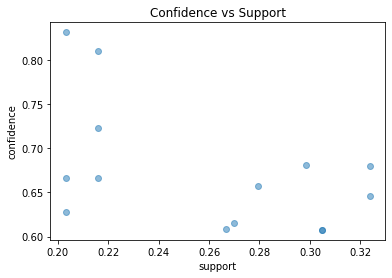

In [13]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Confidence vs Support')
plt.show()

### 2. Lift vs Support

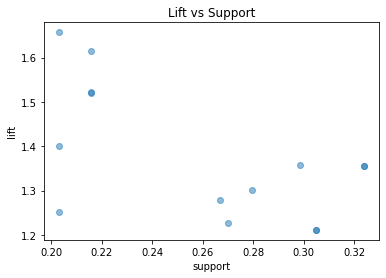

In [14]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Lift vs Support')
plt.show()

### 3. Confidence vs Lift

Both lift and confidence are used for identifying strong rules. In the following plot, we can see confidence increases with the increase of lift except for one pattern. 

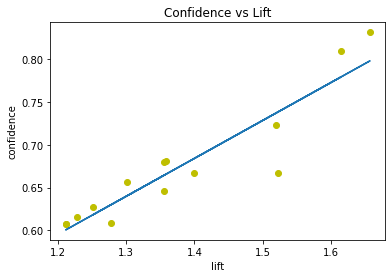

In [15]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)

plt.plot(rules['lift'], rules['confidence'], 'yo')
plt.plot(rules['lift'], fit_fn(rules['lift']));

plt.ylabel('confidence')
plt.xlabel('lift')
plt.title('Confidence vs Lift')
plt.show()

### 4. Interesting patterns

Lift and leverage are used to identify interesting patterns. These measures assess how surprising a rule is. 

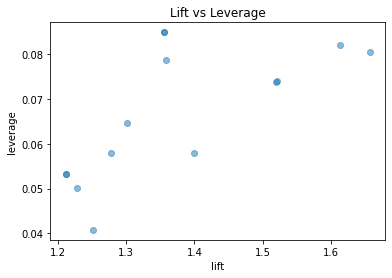

In [16]:
plt.scatter(rules['lift'], rules['leverage'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('leverage')
plt.title('Lift vs Leverage');
plt.show()

In [17]:
rules_sub = rules[(rules['lift'] >= 1.6)]
rules_sub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
12,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


In [18]:
rules_sub = rules[(rules['leverage'] >= 0.08)]
rules_sub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
12,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


# Save your notebook, then `File > Close and Halt`